In [195]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns

In [109]:
#Import data
data = pd.read_excel("ENERGY AUDIT TRACKER DATA.xlsx")

In [110]:
# View columns of the data
data.columns

Index(['S NO', 'COMPANY NAME', 'CUSTOMER INDUSTRY', 'LAST ACTION TAKEN',
       'NEXT ACTION TAKEN', 'STATUS', 'LEAD SOURCE', 'PRIORITY',
       'DEXLER CONTACT', 'DISTRICT', 'STATE', 'CONTACT PERSON', 'PHONE',
       'DESIGNATION', 'EMAIL-ID', 'EA PROPOSAL', 'EA PROPOSAL DATE',
       'CUSTOMER RESPONSE', 'WORK ORDER', 'EA DATE', 'Remarks'],
      dtype='object')

In [111]:
# View data
data.head()

,S NO,COMPANY NAME,CUSTOMER INDUSTRY,LAST ACTION TAKEN,NEXT ACTION TAKEN,STATUS,LEAD SOURCE,PRIORITY,DEXLER CONTACT,DISTRICT,...,CONTACT PERSON,PHONE,DESIGNATION,EMAIL-ID,EA PROPOSAL,EA PROPOSAL DATE,CUSTOMER RESPONSE,WORK ORDER,EA DATE,Remarks
0,1,Akshaya Patra,Food Processing,2016-08-25 00:00:00,2017-04-03 00:00:00,Disqualified,Internal,COLD,Ikram,Bangalore,...,,,,,YES,NaN,NO,NOT RECIEVED,,Not Interested
1,2,"Avtec Ltd. Plot no. S-3/I, Sector-III Pithampu...",Automobile & Ancillary,2015-01-09 00:00:00,,Disqualified,,COLD,Anuj,Indore,...,Pradeep Jain,7292256134,Manager,pradeep.jain@avtec.in,NO,NaN,YES,NOT RECIEVED,,Prem did a site study - no scope for EA
2,3,Terex,Automobile & Ancillary,2016-08-25 00:00:00,2017-04-03 00:00:00,Disqualified,Internal,COLD,Ikram,Hosur,...,,,,,YES,NaN,NO,,,Need to Speak with Ugesh - He is taking care o...
3,4,Bajrang Agro-industries,Food Processing,2015-01-09 00:00:00,,Disqualified,,COLD,Anuj,Indore,...,,7697900539,Technical head,Atul pardesi,NO,NaN,YES,NOT RECIEVED,,New Plant - Single shift - No big scope for EA
4,5,TVS Motors,Automobile & Ancillary,2016-11-07 00:00:00,2016-11-14 00:00:00,Lead,Internal,COLD,Ikram,Hosur,...,,,,,YES,NaN,NO,,,No Customer Response


In [112]:
# Remove columns not used for analysis
data = data[['CUSTOMER INDUSTRY','STATUS', 'LEAD SOURCE', 'PRIORITY',
       'DEXLER CONTACT', 'STATE', 'CONTACT PERSON', 'PHONE',
       'DESIGNATION', 'EMAIL-ID', 'EA PROPOSAL', 
       'CUSTOMER RESPONSE', 'WORK ORDER']]
# Convert phone field to string
data["PHONE"]=data["PHONE"].apply(str)
data.head()

,CUSTOMER INDUSTRY,STATUS,LEAD SOURCE,PRIORITY,DEXLER CONTACT,STATE,CONTACT PERSON,PHONE,DESIGNATION,EMAIL-ID,EA PROPOSAL,CUSTOMER RESPONSE,WORK ORDER
0,Food Processing,Disqualified,Internal,COLD,Ikram,Karnataka,,,,,YES,NO,NOT RECIEVED
1,Automobile & Ancillary,Disqualified,,COLD,Anuj,Madhya Pradesh,Pradeep Jain,7292256134,Manager,pradeep.jain@avtec.in,NO,YES,NOT RECIEVED
2,Automobile & Ancillary,Disqualified,Internal,COLD,Ikram,Tamilnadu,,,,,YES,NO,
3,Food Processing,Disqualified,,COLD,Anuj,Madhya Pradesh,,7697900539,Technical head,Atul pardesi,NO,YES,NOT RECIEVED
4,Automobile & Ancillary,Lead,Internal,COLD,Ikram,Tamilnadu,,,,,YES,NO,


In [113]:
# Combine Contact person, phone, email and designation field
data["CONTACT"] = data["CONTACT PERSON"]+', '+data["DESIGNATION"]+", "+data["EMAIL-ID"]+", ("+data["PHONE"]+")"
# convert data with ',,,()' to ' '
data['CONTACT'][data["CONTACT"]==' ,  ,  , ( )'] = ''
data.head()

,CUSTOMER INDUSTRY,STATUS,LEAD SOURCE,PRIORITY,DEXLER CONTACT,STATE,CONTACT PERSON,PHONE,DESIGNATION,EMAIL-ID,EA PROPOSAL,CUSTOMER RESPONSE,WORK ORDER,CONTACT
0,Food Processing,Disqualified,Internal,COLD,Ikram,Karnataka,,,,,YES,NO,NOT RECIEVED,
1,Automobile & Ancillary,Disqualified,,COLD,Anuj,Madhya Pradesh,Pradeep Jain,7292256134,Manager,pradeep.jain@avtec.in,NO,YES,NOT RECIEVED,"Pradeep Jain, Manager, pradeep.jain@avtec.in, ..."
2,Automobile & Ancillary,Disqualified,Internal,COLD,Ikram,Tamilnadu,,,,,YES,NO,,
3,Food Processing,Disqualified,,COLD,Anuj,Madhya Pradesh,,7697900539,Technical head,Atul pardesi,NO,YES,NOT RECIEVED,", Technical head, Atul pardesi, (7697900539)"
4,Automobile & Ancillary,Lead,Internal,COLD,Ikram,Tamilnadu,,,,,YES,NO,,


In [114]:
# Delete the fields other than contact
data = data[['CUSTOMER INDUSTRY', 'STATUS', 'LEAD SOURCE', 'PRIORITY',
       'DEXLER CONTACT', 'STATE', 'EA PROPOSAL', 'CUSTOMER RESPONSE', 'WORK ORDER',
       'CONTACT']]
data.head()

,CUSTOMER INDUSTRY,STATUS,LEAD SOURCE,PRIORITY,DEXLER CONTACT,STATE,EA PROPOSAL,CUSTOMER RESPONSE,WORK ORDER,CONTACT
0,Food Processing,Disqualified,Internal,COLD,Ikram,Karnataka,YES,NO,NOT RECIEVED,
1,Automobile & Ancillary,Disqualified,,COLD,Anuj,Madhya Pradesh,NO,YES,NOT RECIEVED,"Pradeep Jain, Manager, pradeep.jain@avtec.in, ..."
2,Automobile & Ancillary,Disqualified,Internal,COLD,Ikram,Tamilnadu,YES,NO,,
3,Food Processing,Disqualified,,COLD,Anuj,Madhya Pradesh,NO,YES,NOT RECIEVED,", Technical head, Atul pardesi, (7697900539)"
4,Automobile & Ancillary,Lead,Internal,COLD,Ikram,Tamilnadu,YES,NO,,


In [150]:
# Save clean data in a txt file
data.to_csv("EAT_clean.csv",sep=',',index=False)

### Preliminary Analysis

In [151]:
init_data = pd.read_csv("EAT_clean.csv")

In [152]:
init_data.columns

Index(['CUSTOMER INDUSTRY', 'STATUS', 'LEAD SOURCE', 'PRIORITY',
       'DEXLER CONTACT', 'STATE', 'EA PROPOSAL', 'CUSTOMER RESPONSE',
       'WORK ORDER', 'CONTACT'],
      dtype='object')

In [153]:
#Check values of state
print(init_data["STATE"].unique())

['Karnataka' 'Madhya Pradesh' 'Tamilnadu' 'Punjab' 'Pondicherry'
 'Maharashtra' 'Andhra Pradesh' 'Telangana']


In [154]:
# Check values of customer industry
print(init_data["CUSTOMER INDUSTRY"].unique())
init_data["CUSTOMER INDUSTRY"][init_data["CUSTOMER INDUSTRY"]=='Automobile & Ancillary'] = 'Automobile'
init_data["CUSTOMER INDUSTRY"][init_data["CUSTOMER INDUSTRY"]=='Food processing'] = 'Food Processing'
init_data["CUSTOMER INDUSTRY"][init_data["CUSTOMER INDUSTRY"]=='Dairy'] = 'Food Processing'
init_data["CUSTOMER INDUSTRY"][init_data["CUSTOMER INDUSTRY"]=='Tyre'] = 'Rubber'
init_data["CUSTOMER INDUSTRY"][init_data["CUSTOMER INDUSTRY"]=='Steel'] = 'Metals'
init_data["CUSTOMER INDUSTRY"][init_data["CUSTOMER INDUSTRY"]=='Aluminium '] = 'Metals'
print(init_data["CUSTOMER INDUSTRY"].unique())

['Food Processing' 'Automobile' 'Commercial' 'Textile' 'Glass' 'Tyre'
 'Plastics' 'Rubber' 'Chemical' 'Healthcare' 'Ceramic' 'Steel' 'Dairy'
 'Forging and Castings' 'Aluminium ' 'Home appliances' 'Space' 'Garments'
 'Hotel']
['Food Processing' 'Automobile' 'Commercial' 'Textile' 'Glass' 'Rubber'
 'Plastics' 'Chemical' 'Healthcare' 'Ceramic' 'Metals'
 'Forging and Castings' 'Home appliances' 'Space' 'Garments' 'Hotel']


In [155]:
#Check values of Status
init_data["STATUS"].unique()

array(['Disqualified', 'Lead', 'Hold', 'walk in audit required'],
      dtype=object)

In [156]:
# Check values of Lead Source
print(init_data['LEAD SOURCE'].unique())
init_data['LEAD SOURCE'][init_data['LEAD SOURCE']==' '] = np.nan
print(init_data['LEAD SOURCE'].unique())

['Internal' ' ' nan]
['Internal' nan]


In [158]:
# Check values of Priority
print(init_data['PRIORITY'].unique())
init_data['PRIORITY'][init_data['PRIORITY']=='cold'] = 'COLD'
print(init_data['PRIORITY'].unique())

['COLD' 'WARM' 'HOT' 'MEDIUM' 'cold']
['COLD' 'WARM' 'HOT' 'MEDIUM']


In [162]:
# Check values of Dexler contact
print(init_data['DEXLER CONTACT'].unique())
init_data['DEXLER CONTACT'][init_data['DEXLER CONTACT']=='Anuj'] = 'Anuj Singh Tomar'
init_data['DEXLER CONTACT'][init_data['DEXLER CONTACT']=='Premkumar/Karan'] = 'Karan'
init_data['DEXLER CONTACT'][init_data['DEXLER CONTACT']=='Piyush/Karan'] = 'Piyush'
print(init_data['DEXLER CONTACT'].unique())

['Ikram' 'Anuj Singh Tomar' 'Karan' 'Premkumar' 'Gurpreet' 'Dinesh'
 'Piyush' 'Premkumar/Karan' 'Piyush/Karan']
['Ikram' 'Anuj Singh Tomar' 'Karan' 'Premkumar' 'Gurpreet' 'Dinesh'
 'Piyush']


In [164]:
# Check values of EA PROPOSAL
print(init_data['EA PROPOSAL'].unique())
init_data['EA PROPOSAL'][init_data['EA PROPOSAL']=='Yes'] = 'YES'
print(init_data['EA PROPOSAL'].unique())

['YES' 'NO' 'Yes']
['YES' 'NO']


In [166]:
# Check values of CUSTOMER RESPONSE
print(init_data['CUSTOMER RESPONSE'].unique())
init_data['CUSTOMER RESPONSE'][init_data['CUSTOMER RESPONSE']==' '] = np.nan
print(init_data['CUSTOMER RESPONSE'].unique())

['NO' 'YES' ' ' nan]
['NO' 'YES' nan]


In [168]:
# Check values of WORK ORDER
print(init_data['WORK ORDER'].unique())
init_data['WORK ORDER'][init_data['WORK ORDER']=='our team not interested'] = 'NOT INTERESTED'
init_data['WORK ORDER'][init_data['WORK ORDER']=='PO awaited'] = 'NOT RECEIVED'
init_data['WORK ORDER'][init_data['WORK ORDER']=='Payment for A1 received'] = 'RECEIVED'
init_data['WORK ORDER'][init_data['WORK ORDER']=='Proposal submitted'] = 'RECEIVED'
init_data['WORK ORDER'][init_data['WORK ORDER']=='NOT RECIEVED'] = 'NOT RECEIVED'
init_data['WORK ORDER'][init_data['WORK ORDER']=='RECIEVED'] = 'RECEIVED'
init_data['WORK ORDER'][init_data['WORK ORDER']==' '] = np.nan
print(init_data['WORK ORDER'].unique())

['NOT RECIEVED' ' ' 'RECIEVED' 'our team not interested' 'PO awaited'
 'Payment for A1 received' 'Proposal submitted']
['NOT RECEIVED' nan 'RECEIVED' 'NOT INTERESTED']


In [181]:
# Check values of CONTACT
init_data['CONTACT'].isnull()

0      True
1     False
2      True
3     False
4      True
5     False
6      True
7      True
8      True
9     False
10     True
11    False
12     True
13    False
14     True
15    False
16    False
17     True
18    False
19    False
20    False
21     True
22    False
23    False
24    False
25    False
26     True
27     True
28    False
29    False
      ...  
33    False
34    False
35    False
36    False
37     True
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52     True
53    False
54    False
55    False
56    False
57     True
58    False
59    False
60    False
61    False
62     True
Name: CONTACT, Length: 63, dtype: bool

In [187]:
init_data.head()

,CUSTOMER INDUSTRY,STATUS,LEAD SOURCE,PRIORITY,DEXLER CONTACT,STATE,EA PROPOSAL,CUSTOMER RESPONSE,WORK ORDER,CONTACT
0,Food Processing,Disqualified,Internal,COLD,Ikram,Karnataka,YES,NO,NOT RECEIVED,NaN
1,Automobile,Disqualified,NaN,COLD,Anuj Singh Tomar,Madhya Pradesh,NO,YES,NOT RECEIVED,"Pradeep Jain, Manager, pradeep.jain@avtec.in, ..."
2,Automobile,Disqualified,Internal,COLD,Ikram,Tamilnadu,YES,NO,NaN,NaN
3,Food Processing,Disqualified,NaN,COLD,Anuj Singh Tomar,Madhya Pradesh,NO,YES,NOT RECEIVED,", Technical head, Atul pardesi, (7697900539)"
4,Automobile,Lead,Internal,COLD,Ikram,Tamilnadu,YES,NO,NaN,NaN


In [183]:
# Save clean data in a txt file
init_data.to_csv("EAT_clean_2.csv",sep=',',index=False)

### Analysis of Data

In [184]:
data_2 = pd.read_csv("EAT_clean_2.csv")

In [188]:
data_2.head()

,CUSTOMER INDUSTRY,STATUS,LEAD SOURCE,PRIORITY,DEXLER CONTACT,STATE,EA PROPOSAL,CUSTOMER RESPONSE,WORK ORDER,CONTACT
0,Food Processing,Disqualified,Internal,COLD,Ikram,Karnataka,YES,NO,NOT RECEIVED,NaN
1,Automobile,Disqualified,NaN,COLD,Anuj Singh Tomar,Madhya Pradesh,NO,YES,NOT RECEIVED,"Pradeep Jain, Manager, pradeep.jain@avtec.in, ..."
2,Automobile,Disqualified,Internal,COLD,Ikram,Tamilnadu,YES,NO,NaN,NaN
3,Food Processing,Disqualified,NaN,COLD,Anuj Singh Tomar,Madhya Pradesh,NO,YES,NOT RECEIVED,", Technical head, Atul pardesi, (7697900539)"
4,Automobile,Lead,Internal,COLD,Ikram,Tamilnadu,YES,NO,NaN,NaN


[Text(0, 0, 'Karnataka'),
 Text(0, 0, 'Madhya Pradesh'),
 Text(0, 0, 'Tamilnadu'),
 Text(0, 0, 'Punjab'),
 Text(0, 0, 'Pondicherry'),
 Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'Andhra Pradesh'),
 Text(0, 0, 'Telangana')]

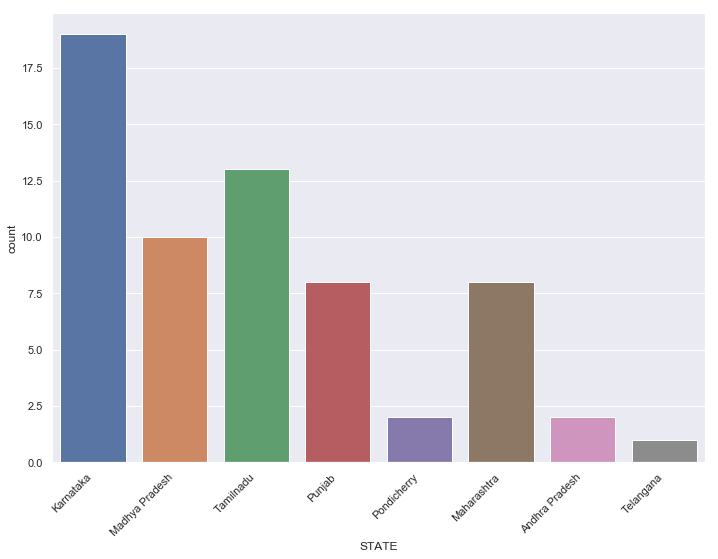

In [191]:
chart = sns.countplot(x= 'STATE', data = data_2)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

[Text(0, 0, 'Food Processing'),
 Text(0, 0, 'Commercial'),
 Text(0, 0, 'Plastics'),
 Text(0, 0, 'Automobile'),
 Text(0, 0, 'Textile'),
 Text(0, 0, 'Forging and Castings'),
 Text(0, 0, 'Space'),
 Text(0, 0, 'Garments'),
 Text(0, 0, 'Hotel')]

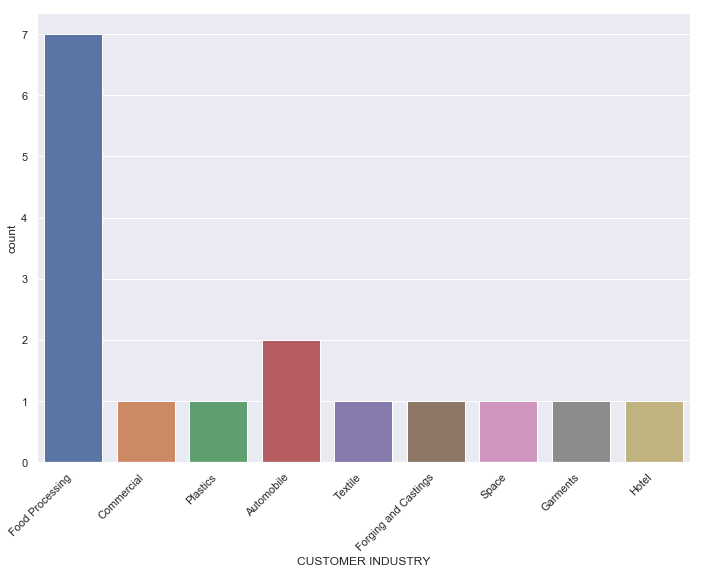

In [194]:
chart = sns.countplot(x= 'CUSTOMER INDUSTRY', data = data_2.loc[(data_2['STATE'] == 'Karnataka') & (data_2['EA PROPOSAL'] == 'YES')])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

[Text(0, 0, 'Food Processing'),
 Text(0, 0, 'Automobile'),
 Text(0, 0, 'Commercial'),
 Text(0, 0, 'Textile'),
 Text(0, 0, 'Glass'),
 Text(0, 0, 'Rubber'),
 Text(0, 0, 'Plastics'),
 Text(0, 0, 'Chemical'),
 Text(0, 0, 'Healthcare'),
 Text(0, 0, 'Ceramic'),
 Text(0, 0, 'Metals'),
 Text(0, 0, 'Forging and Castings'),
 Text(0, 0, 'Home appliances'),
 Text(0, 0, 'Space'),
 Text(0, 0, 'Garments'),
 Text(0, 0, 'Hotel')]

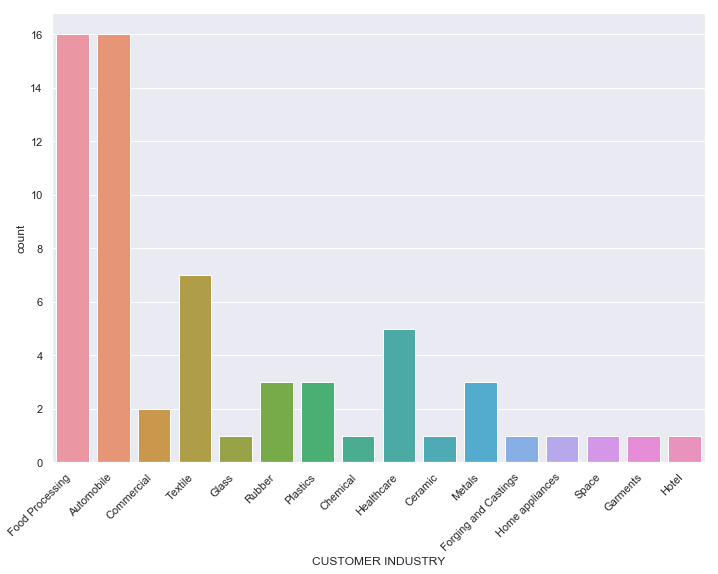

In [190]:
chart = sns.countplot(x= 'CUSTOMER INDUSTRY', data = data_2)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

In [204]:
pie_data = data_2.groupby("WORK ORDER").count()
pie_data

,CUSTOMER INDUSTRY,STATUS,LEAD SOURCE,PRIORITY,DEXLER CONTACT,STATE,EA PROPOSAL,CUSTOMER RESPONSE,CONTACT
WORK ORDER,,,,,,,,,
NOT INTERESTED,1,1,0,1,1,1,1,1,1
NOT RECEIVED,34,34,11,34,34,34,34,32,33
RECEIVED,9,9,5,9,9,9,9,8,5


([<matplotlib.patches.Wedge at 0x2896a0100b8>,
 [Text(1.0971973259042975, 0.07847310385386075, 'NOT INTERESTED'),
  Text(-0.9253788481504626, 0.5947049582740364, 'NOT RECEIVED'),
  Text(0.8805952752433088, -0.6592055530858043, 'RECEIVED')])

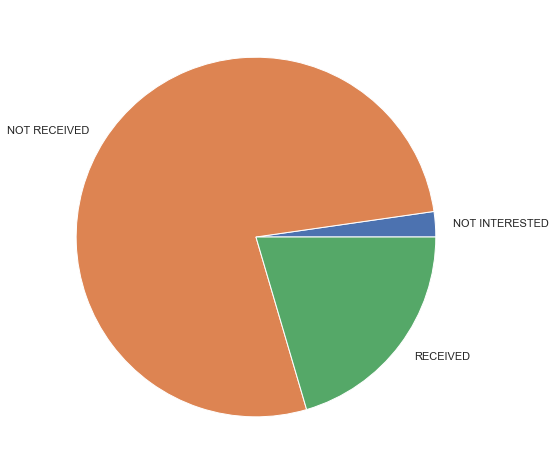

In [208]:
pie(data_2.groupby("WORK ORDER").count()["CUSTOMER INDUSTRY"],labels=data_2.groupby("WORK ORDER").count().index)

([<matplotlib.patches.Wedge at 0x2896b17a278>,
 [Text(0.4382411947237756, 1.0089324334399594, 'No Contact (17)'),
  Text(-0.43824110026070223, -1.0089324744710566, 'Contact (29)')])

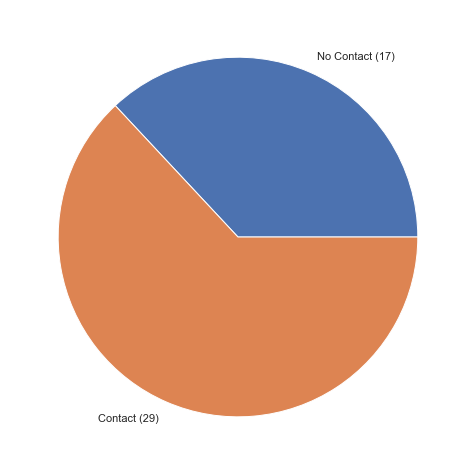

In [217]:
num_con = data_2["CONTACT"].isna().sum()
num_con
num_total = data_2["CONTACT"].count()
non_nan = num_total-num_con
pie(pd.Series([num_con,non_nan]),labels=["No Contact ("+str(num_con)+")" ,"Contact ("+str(non_nan)+")"])

([<matplotlib.patches.Wedge at 0x2896af632b0>,
 [Text(0.5018316954487894, 0.9788590038626573, 'NO'),
  Text(-0.5018316038013927, -0.9788590508475273, 'YES')])

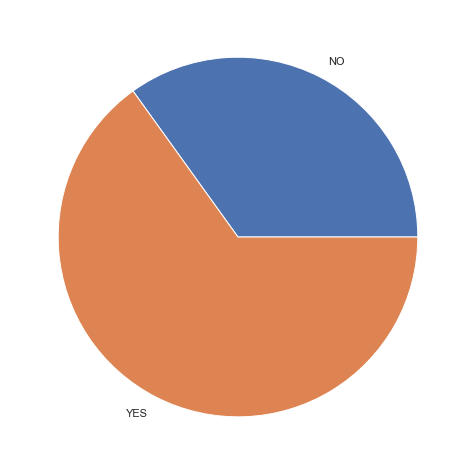

In [218]:
pie(data_2.groupby("EA PROPOSAL").count()["CUSTOMER INDUSTRY"],labels=data_2.groupby("EA PROPOSAL").count().index)

([<matplotlib.patches.Wedge at 0x2896af94c50>,
 [Text(0.8426488837530798, 0.7070663750382201, 'Disqualified'),
  Text(0.13677806061501951, 1.0914631290769259, 'Hold'),
  Text(-0.8768457136504013, -0.6641849098352948, 'Lead'),
  Text(1.0945338663710538, -0.10952449665181087, 'walk in audit required')])

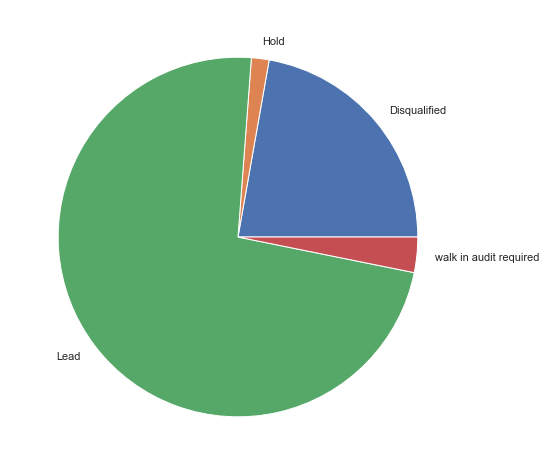

In [219]:
pie(data_2.groupby("STATUS").count()["CUSTOMER INDUSTRY"],labels=data_2.groupby("STATUS").count().index)